# Maleri Classifier v2

This time with 134 more layers

Setup

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
types = 'Abildgaard, Nicolai','Dahl, J.C','Eckersberg, C.W','Hammershøi, Vilhelm','Hansen, Constantin','Jensen, C.A','Juel, Jens','Krøyer, P.S','Kyhn, Vilhelm','Købke, Christen','Lorentzen, C.A','Marstrand, Wilhelm','Pauelsen, Erik','Philipsen, Theodor','Skovgaard, P.C'
path = Path('gdrive/MyDrive/AI Machine Learning/images/Maleri Classifier')

File tests

In [ ]:
fns = get_image_files(path)
fns

In [5]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [6]:
dls = data.dataloaders(path)

Model training

In [7]:
data = data.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = data.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet152, metrics=error_rate)
learn.fine_tune(10)

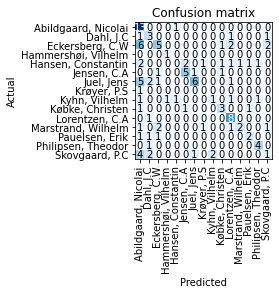

In [36]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Exporting

In [37]:
learn.export()

App

In [40]:
learn_inf = load_learner('gdrive/MyDrive/AI Machine Learning/models/MaleriExport_v2.pkl')

In [41]:
img = PILImage.create('gdrive/MyDrive/AI Machine Learning/images/Unknown Maleri.jpg')

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

In [45]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [46]:
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [47]:
VBox([widgets.Label('Select your painting!'), 
      btn_upload, btn_run, out_pl, lbl_pred])